## How many different kinds of NBA players are there?

Author: 
    Sahil D. Shah (sahil.shah@u.northwestern.edu)
    
Last updated: 
    12/19/2018
    
Description: 
    Code used for my NBA Players blogpost 
    
Dataset:
    https://www.basketball-reference.com/leagues/NBA_2018_per_game.html

### Obtain the data

Save table from https://www.basketball-reference.com/leagues/NBA_2018_per_game.html as a csv and read in as a Pandas dataframe

In [1]:
import pandas as pd

/Users/sds930/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/sds930/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
raw_dataframe = pd.read_csv("../data/nba-player-stats.csv")

In [3]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 12 columns):
Player    540 non-null object
MP        540 non-null float64
FG%       537 non-null float64
3P%       491 non-null float64
FT%       501 non-null float64
TRB       540 non-null float64
AST       540 non-null float64
STL       540 non-null float64
BLK       540 non-null float64
TOV       540 non-null float64
PF        540 non-null float64
PS/G      540 non-null float64
dtypes: float64(11), object(1)
memory usage: 50.7+ KB


### Scrub the data

#### Drop players (rows) with any missing stats 

https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [61]:
scrubbed_df = raw_dataframe.dropna()

In [6]:
scrubbed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 525
Data columns (total 12 columns):
Player    469 non-null object
MP        469 non-null float64
FG%       469 non-null float64
3P%       469 non-null float64
FT%       469 non-null float64
TRB       469 non-null float64
AST       469 non-null float64
STL       469 non-null float64
BLK       469 non-null float64
TOV       469 non-null float64
PF        469 non-null float64
PS/G      469 non-null float64
dtypes: float64(11), object(1)
memory usage: 47.6+ KB


In [7]:
scrubbed_df.head()

,Player,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PS/G
0,LeBron James\jamesle01,36.9,0.542,0.367,0.731,8.6,9.1,1.4,0.9,4.2,1.7,27.5
1,Giannis Antetokounmpo\antetgi01,36.7,0.529,0.307,0.760,10.0,4.8,1.5,1.4,3.0,3.1,26.9
2,Jimmy Butler\butleji01,36.7,0.474,0.350,0.854,5.3,4.9,2.0,0.4,1.8,1.3,22.2
3,Damian Lillard\lillada01,36.6,0.439,0.361,0.916,4.5,6.6,1.1,0.4,2.8,1.6,26.9
4,Paul George\georgpa01,36.6,0.430,0.401,0.822,5.7,3.3,2.0,0.5,2.7,2.9,21.9


####  Select TRB, AST, and PS/G to cluster players

In [36]:
X = scrubbed_df.iloc[:,[5,6,11]]

In [38]:
X.head()

,TRB,AST,PS/G
0,8.6,9.1,27.5
1,10.0,4.8,26.9
2,5.3,4.9,22.2
3,4.5,6.6,26.9
4,5.7,3.3,21.9


### Explore the data

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
#### What does a scatter plot matrix of all the data look like

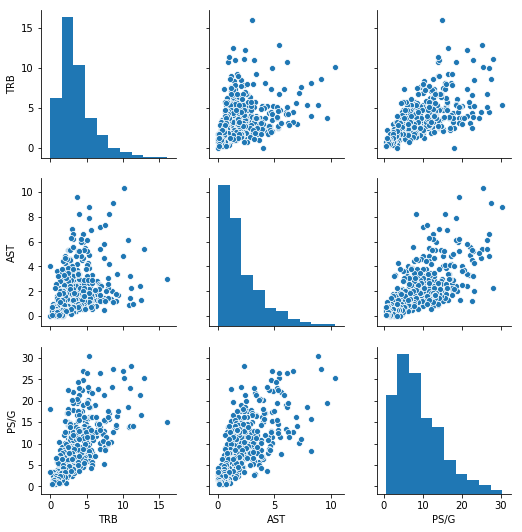

In [41]:
sns.pairplot(X)

### Model the data

#### Scale each feature (player stats) so they're centered and have unit variance 

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.


In [42]:
from sklearn import preprocessing
import numpy as np

In [43]:
#Apply preprocessing.scale  columns except player names

X_scaled =  preprocessing.scale(X,
                                axis=0, 
                                with_mean=True, 
                                with_std=True, 
                                copy=True)


In [44]:
np.mean(X_scaled,axis=0)

array([1.21201320e-16, 6.06006598e-17, 3.03003299e-16])

In [45]:
np.var(X_scaled,axis=0)

array([1., 1., 1.])

#### Cluster the players using K Means

https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

In [46]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

##### Select the number of clusters using total_within_sumsquares and silhoutte_avg

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [47]:
MAX_NUMBER_CLUSTERS = 10

DATA = X_scaled

In [48]:

# Initialize vector of measures to determine numbers of clusters
total_within_sumsquares = np.zeros(MAX_NUMBER_CLUSTERS)
silhouette_avg = np.zeros(MAX_NUMBER_CLUSTERS-1)

# Perform clustering 

for number_of_clusters in list(range(1, MAX_NUMBER_CLUSTERS + 1)): # Indexing list(range(1,7)) [1,3,4,5,6,7]
    
    clt = KMeans(n_clusters = number_of_clusters,
                 init='k-means++',
                 n_init = 10)
    
    model = clt.fit(DATA) 
    
    
    total_within_sumsquares[number_of_clusters - 1] = model.inertia_ # number of clusters - 1 from 0 to 10
    
    # silhoutte score not defined for k =1 cluster
    if number_of_clusters > 1:
    
        silhouette_avg[number_of_clusters - 2] = silhouette_score(DATA, model.labels_)

In [49]:
total_within_sumsquares

array([1407.        ,  759.43074469,  573.8286108 ,  452.21866666,
        372.54257324,  332.08261748,  282.75443172,  259.06400334,
        230.81994212,  211.37064502])

In [50]:
silhouette_avg

array([0.44530599, 0.41587837, 0.35719091, 0.3881811 , 0.36775137,
       0.34116425, 0.34315776, 0.35294698, 0.31328515])

In [52]:
plt.rcParams['figure.figsize'] = [10, 5]


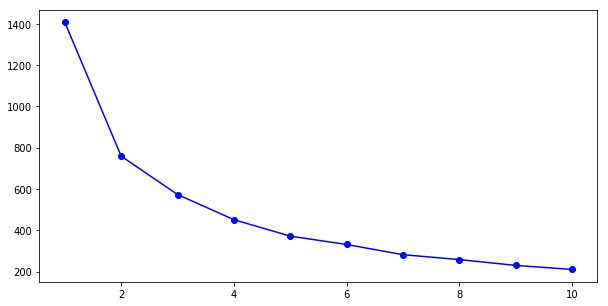

In [53]:
plt.plot(list(range(1,MAX_NUMBER_CLUSTERS + 1)), 
         total_within_sumsquares,
         'bo-')


##### Select three clusters. What players are in the three clusters?


In [54]:
clt = KMeans(n_clusters = 3,
                 init='k-means++',
                 n_init = 10)
    
model = clt.fit(DATA) 
    

In [55]:
model.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [62]:
scrubbed_df['label'] = model.labels_

/Users/sds930/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Interpret the results

In [88]:
scrubbed_df[scrubbed_df['label'] == 0]

,Player,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PS/G,label
0,LeBron James\jamesle01,36.9,0.542,0.367,0.731,8.6,9.1,1.4,0.9,4.2,1.7,27.5,0
1,Giannis Antetokounmpo\antetgi01,36.7,0.529,0.307,0.760,10.0,4.8,1.5,1.4,3.0,3.1,26.9,0
2,Jimmy Butler\butleji01,36.7,0.474,0.350,0.854,5.3,4.9,2.0,0.4,1.8,1.3,22.2,0
3,Damian Lillard\lillada01,36.6,0.439,0.361,0.916,4.5,6.6,1.1,0.4,2.8,1.6,26.9,0
4,Paul George\georgpa01,36.6,0.430,0.401,0.822,5.7,3.3,2.0,0.5,2.7,2.9,21.9,0
6,Russell Westbrook\westbru01,36.4,0.449,0.298,0.737,10.1,10.3,1.8,0.3,4.8,2.5,25.4,0
7,Khris Middleton\middlkh01,36.4,0.466,0.359,0.884,5.2,4.0,1.5,0.3,2.3,3.3,20.1,0
8,Bradley Beal\bealbr01,36.3,0.460,0.375,0.791,4.4,4.5,1.2,0.4,2.6,2.0,22.6,0
10,DeMarcus Cousins\couside01,36.2,0.470,0.354,0.746,12.9,5.4,1.6,1.6,5.0,3.8,25.2,0
11,CJ McCollum\mccolcj01,36.1,0.443,0.397,0.836,4.0,3.4,1.0,0.4,1.9,2.1,21.4,0


In [89]:
scrubbed_df[scrubbed_df['label'] == 0].mean(axis=0)

MP       31.342857
FG%       0.449157
3P%       0.360600
FT%       0.798314
TRB       4.542857
AST       5.318571
STL       1.175714
BLK       0.461429
TOV       2.478571
PF        2.168571
PS/G     17.272857
label     0.000000
dtype: float64

In [90]:
scrubbed_df[scrubbed_df['label'] == 1]

,Player,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PS/G,label
15,Aaron Jackson\jacksaa01,35.0,0.333,0.250,0.500,3.0,1.0,0.0,0.0,1.0,4.0,8.0,1
104,Dillon Brooks\brookdi01,28.7,0.440,0.356,0.747,3.1,1.6,0.9,0.2,1.5,2.8,11.0,1
106,Tyrone Wallace\wallaty01,28.4,0.445,0.250,0.782,3.5,2.4,0.9,0.4,1.5,2.8,9.7,1
109,J.R. Smith\smithjr01,28.1,0.403,0.375,0.696,2.9,1.8,0.9,0.1,1.0,2.0,8.3,1
115,Reggie Bullock\bullore01,27.9,0.489,0.445,0.796,2.5,1.5,0.8,0.2,0.8,1.1,11.3,1
117,Yogi Ferrell\ferreyo01,27.8,0.426,0.373,0.796,3.0,2.5,0.8,0.1,1.0,1.9,10.2,1
124,Stanley Johnson\johnsst04,27.4,0.375,0.286,0.772,3.7,1.6,1.4,0.2,1.1,2.4,8.7,1
125,Tony Snell\snellto01,27.4,0.435,0.403,0.792,1.9,1.3,0.6,0.4,0.5,1.5,6.9,1
130,George Hill\hillge01,27.0,0.460,0.415,0.786,2.7,2.8,0.9,0.4,1.3,1.9,10.0,1
131,Cory Joseph\josepco01,27.0,0.424,0.353,0.745,3.2,3.2,1.0,0.2,1.1,1.7,7.9,1


In [92]:
scrubbed_df[scrubbed_df['label'] == 1].mean(axis=0)

MP       15.325806
FG%       0.424713
3P%       0.300140
FT%       0.735283
TRB       2.240143
AST       1.232616
STL       0.482796
BLK       0.258781
TOV       0.722939
PF        1.397849
PS/G      5.236918
label     1.000000
dtype: float64

In [93]:
scrubbed_df[scrubbed_df['label'] == 2]

,Player,MP,FG%,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PS/G,label
5,Anthony Davis\davisan02,36.4,0.534,0.340,0.828,11.1,2.3,1.5,2.6,2.2,2.1,28.1,2
9,Andrew Wiggins\wiggian01,36.3,0.438,0.331,0.643,4.4,2.0,1.1,0.6,1.7,2.0,17.7,2
13,Karl-Anthony Towns\townska01,35.6,0.545,0.421,0.858,12.3,2.4,0.8,1.4,1.9,3.5,21.3,2
19,Klay Thompson\thompkl01,34.3,0.488,0.440,0.837,3.8,2.5,0.8,0.5,1.8,1.6,20.0,2
22,Harrison Barnes\barneha02,34.2,0.445,0.357,0.827,6.1,2.0,0.6,0.2,1.5,1.2,18.9,2
27,Trevor Ariza\arizatr01,33.9,0.412,0.368,0.854,4.4,1.6,1.5,0.2,0.8,2.0,11.7,2
28,Wesley Matthews\matthwe02,33.8,0.406,0.381,0.822,3.1,2.7,1.2,0.3,1.3,2.2,12.7,2
31,Andre Drummond\drumman01,33.7,0.529,0.000,0.605,16.0,3.0,1.5,1.6,2.6,3.2,15.0,2
32,LaMarcus Aldridge\aldrila01,33.5,0.510,0.293,0.837,8.5,2.0,0.6,1.2,1.5,2.1,23.1,2
35,Tobias Harris\harrito02,33.4,0.460,0.411,0.829,5.5,2.4,0.9,0.4,1.3,2.1,18.6,2


In [94]:
scrubbed_df[scrubbed_df['label'] == 2].mean(axis=0)

MP       27.039167
FG%       0.478092
3P%       0.321583
FT%       0.754217
TRB       5.920000
AST       1.900833
STL       0.827500
BLK       0.668333
TOV       1.456667
PF        2.218333
PS/G     12.715833
label     2.000000
dtype: float64